In [19]:
import pandas as pd
import numpy as np

- Preprocess -> one hot encoding -> removing label -> splitting into training and testing
- Testing -> call preprocess function (random train-test split) -> test on validation -> average over n iterations

In [67]:
# Import the dataset
housing_prices = pd.read_csv("/Users/alexanderwycoff/Documents/housing.csv")

# One hot encode final column
from sklearn.preprocessing import OneHotEncoder
final_col = housing_prices["ocean_proximity"]
housing_prices = housing_prices.drop("ocean_proximity", axis=1)

enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
# transformed column needs to be a dataframe
transformed = enc.fit_transform(pd.DataFrame(final_col))
housing_prices = pd.concat([housing_prices, transformed], axis=1)

In [53]:
# we want to predict median house value
label = housing_prices["median_house_value"] # label
features = housing_prices.drop("median_house_value", axis=1) # features

In [77]:
# split into training and validation
from sklearn.model_selection import train_test_split
train_features, test_features, train_label, test_label = train_test_split(features, label, test_size=0.2)

train_features = train_features.reset_index(drop=True)
test_features = test_features.reset_index(drop=True)
train_label = train_label.reset_index(drop=True)
test_label = test_label.reset_index(drop=True)

In [91]:
def preprocess():
    # Import the dataset
    housing_prices = pd.read_csv("housing.csv") # change to your file location
    housing_prices.dropna(inplace=True)

    # One hot encode final column
    from sklearn.preprocessing import OneHotEncoder
    final_col = housing_prices["ocean_proximity"]
    housing_prices = housing_prices.drop("ocean_proximity", axis=1)

    enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
    # transformed column needs to be a dataframe
    transformed = enc.fit_transform(pd.DataFrame(final_col))
    housing_prices = pd.concat([housing_prices, transformed], axis=1)
    
    # we want to predict median house value
    label = housing_prices["median_house_value"] # label
    features = housing_prices.drop("median_house_value", axis=1) # features
    
    # split into training and validation
    from sklearn.model_selection import train_test_split
    train_features, test_features, train_label, test_label = train_test_split(features, label, test_size=0.2)

    train_features = train_features.reset_index(drop=True)
    test_features = test_features.reset_index(drop=True)
    train_label = train_label.reset_index(drop=True)
    test_label = test_label.reset_index(drop=True)
    
    return train_features, test_features, train_label, test_label

In [103]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

iterations = 100
total_error = 0
reg = LinearRegression()
for i in range(iterations):
    train_features, test_features, train_label, test_label = preprocess()
    reg = LinearRegression().fit(train_features, train_label)
    output = reg.predict(test_features)
    total_error += mean_absolute_percentage_error(output, test_label)

print(f"Average Error: {total_error / iterations}")

# Can do something like this as well for print statements
# print("Average Error:")
# print(total_error / iterations)

Average Error: 0.3783051557647253


In [106]:
train_features, test_features, train_label, test_label = preprocess()
weights = reg.coef_

(array([-2.62244532e+04, -2.48484814e+04,  1.11185223e+03, -6.97026135e+00,
         9.66198426e+01, -3.71444097e+01,  5.71624261e+01,  3.94574408e+04,
        -2.34422328e+04, -6.37699174e+04,  1.36299862e+05, -2.85832432e+04,
        -2.05044690e+04]),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
        'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
        'ocean_proximity_NEAR OCEAN'],
       dtype='object'))

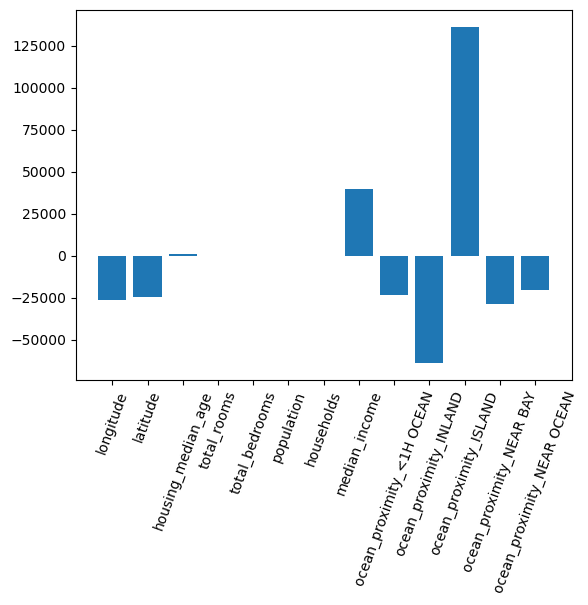

In [110]:
import matplotlib.pyplot as plt
plt.bar(train_features.columns, weights)
plt.xticks(rotation=70)
plt.show()